In [1]:
# import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# set input directory
input_dir = 'input'

In [3]:
# set dataset file name
input_data_file = 'E:\pt2\dataset'

In [4]:
# display list of files in input directory
os.listdir('E:\pt2\dataset')

['data.xlsx']

In [5]:
data_path = os.path.join(os.curdir,input_dir,input_data_file)
data_path

'E:\\pt2\\dataset'

In [6]:
raw_data = pd.read_excel('data.xlsx')

In [7]:
raw_data.head()

,TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10,PM2.5,RH,SO2
0,16,2.1,0.79,0.14,1.2,16,17,37,177,78x,57,12
1,16,2.1,0.8,0.15,1.3,16,17,36,178,77x,57,11
2,16,2.1,0.71,0.13,1,13,14,38,163,72x,57,8
3,15,2,0.66,0.12,0.8,11,12,39,147,65x,58,6.5
4,15,2,0.53,0.11,0.6,10,11,38,131,56x,58,5.5


In [8]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218639 entries, 0 to 218638
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   TEMP    200169 non-null  object
 1   CH4     95822 non-null   object
 2   CO      217310 non-null  object
 3   NMHC    95614 non-null   object
 4   NO      217227 non-null  object
 5   NO2     216681 non-null  object
 6   NOx     217228 non-null  object
 7   O3      199864 non-null  object
 8   PM10    215761 non-null  object
 9   PM2.5   215768 non-null  object
 10  RH      200243 non-null  object
 11  SO2     217046 non-null  object
dtypes: object(12)
memory usage: 20.0+ MB


In [9]:
raw_data.columns

Index(['TEMP', 'CH4', 'CO', 'NMHC', 'NO', 'NO2', 'NOx', 'O3', 'PM10', 'PM2.5',
       'RH', 'SO2'],
      dtype='object')

In [10]:
raw_data.dropna(axis = 0, inplace=True)

In [11]:
raw_data.isna().sum()

TEMP     0
CH4      0
CO       0
NMHC     0
NO       0
NO2      0
NOx      0
O3       0
PM10     0
PM2.5    0
RH       0
SO2      0
dtype: int64

In [12]:
def numeric(row):
    try:
        if np.isnan(row):
            return
        else:
            row =str(row)
            return float(row.replace('x','').replace('#','').replace('*',''))
    except TypeError:
        row =str(row)
        return float(row.replace('x','').replace('#','').replace('*',''))

In [13]:
raw_data['O3'] = raw_data['O3'].apply(numeric)
#print(raw_data['NO'].describe())

In [14]:
raw_data['PM2.5'] = raw_data['PM2.5'].apply(numeric)
raw_data['TEMP'] = raw_data['TEMP'].apply(numeric)
raw_data['CH4'] = raw_data['CH4'].apply(numeric)
raw_data['CO'] = raw_data['CO'].apply(numeric)
raw_data['NMHC'] = raw_data['NMHC'].apply(numeric)
raw_data['NO'] = raw_data['NO'].apply(numeric)
raw_data['NO2'] = raw_data['NO2'].apply(numeric)
raw_data['NOx'] = raw_data['NOx'].apply(numeric)
raw_data['PM10'] = raw_data['PM10'].apply(numeric)
raw_data['RH'] = raw_data['RH'].apply(numeric)
raw_data['SO2'] = raw_data['SO2'].apply(numeric)

In [15]:
len(raw_data)

77393

In [16]:
raw_data = raw_data[0:5000]

In [17]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 5107
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TEMP    5000 non-null   float64
 1   CH4     5000 non-null   float64
 2   CO      5000 non-null   float64
 3   NMHC    5000 non-null   float64
 4   NO      5000 non-null   float64
 5   NO2     5000 non-null   float64
 6   NOx     5000 non-null   float64
 7   O3      5000 non-null   float64
 8   PM10    5000 non-null   float64
 9   PM2.5   5000 non-null   float64
 10  RH      5000 non-null   float64
 11  SO2     5000 non-null   float64
dtypes: float64(12)
memory usage: 507.8 KB


In [18]:
raw_data.describe()

,TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10,PM2.5,RH,SO2
count,5000.000000,5000.00000,5000.000000,5000.00000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,23.435580,2.01058,0.601756,0.26360,6.626260,22.59842,29.217000,26.089740,49.112200,22.068000,70.974600,3.88988
std,6.417126,0.17949,0.357413,0.20546,10.018933,10.98201,18.024268,19.868315,101.990747,21.076637,12.663271,2.55096
min,7.900000,1.10000,-0.060000,0.02000,-0.800000,3.40000,3.400000,0.000000,0.000000,0.000000,21.000000,-0.20000
25%,18.000000,1.90000,0.370000,0.13000,1.900000,15.00000,17.000000,9.400000,32.000000,13.000000,61.000000,2.20000
50%,24.000000,2.00000,0.520000,0.21000,3.500000,21.00000,25.000000,24.000000,42.000000,18.000000,73.000000,3.30000
75%,29.000000,2.00000,0.730000,0.33000,6.900000,29.00000,37.000000,38.000000,59.000000,28.000000,81.000000,4.80000
max,37.000000,3.80000,5.900000,3.27000,212.000000,79.00000,268.000000,132.000000,5004.000000,840.000000,99.000000,32.00000


In [19]:
temp_data = raw_data[['TEMP','RH','CH4','NMHC','NO', 'NOx']]

In [20]:
# axis = 1 : columnwise operation
data = raw_data.drop(columns=['TEMP','RH','CH4','NMHC','NO', 'NOx'],axis=1)
data.head()

,CO,NO2,O3,PM10,PM2.5,SO2
0,0.79,16.0,37.0,177.0,78.0,12.0
1,0.80,16.0,36.0,178.0,77.0,11.0
2,0.71,13.0,38.0,163.0,72.0,8.0
3,0.66,11.0,39.0,147.0,65.0,6.5
4,0.53,10.0,38.0,131.0,56.0,5.5


In [21]:
data['AQI']= data.max(axis=1)
data.head()

,CO,NO2,O3,PM10,PM2.5,SO2,AQI
0,0.79,16.0,37.0,177.0,78.0,12.0,177.0
1,0.80,16.0,36.0,178.0,77.0,11.0,178.0
2,0.71,13.0,38.0,163.0,72.0,8.0,163.0
3,0.66,11.0,39.0,147.0,65.0,6.5,147.0
4,0.53,10.0,38.0,131.0,56.0,5.5,131.0


In [22]:
data['AQI'].describe()

count    5000.000000
mean       53.106000
std       101.548314
min        10.000000
25%        35.000000
50%        45.000000
75%        61.000000
max      5004.000000
Name: AQI, dtype: float64

In [23]:
aqi = data['AQI']

In [3]:
plt.figure(figsize=(15,8), dpi=120)
image = plt.imread('health.jpg')
plt.axis('off')
plt.imshow(image)
plt.show()

NameError: name 'plt' is not defined

In [24]:
aqi[(aqi > 0) & (aqi <= 50)] = 0
aqi[(aqi > 50) & (aqi <= 100)] = 1
aqi[(aqi > 100) & (aqi <= 150)] = 2
aqi[(aqi > 150) & (aqi <= 200)] = 3
aqi[(aqi > 200)] = 4

In [25]:
aqi.unique()

array([3., 2., 1., 0., 4.])

In [26]:
data['label'] = data['AQI'].astype('int8')

In [27]:
data.drop(columns=['AQI'], axis= 1, inplace=True)

In [28]:
data.head()

,CO,NO2,O3,PM10,PM2.5,SO2,label
0,0.79,16.0,37.0,177.0,78.0,12.0,3
1,0.80,16.0,36.0,178.0,77.0,11.0,3
2,0.71,13.0,38.0,163.0,72.0,8.0,3
3,0.66,11.0,39.0,147.0,65.0,6.5,2
4,0.53,10.0,38.0,131.0,56.0,5.5,2


In [29]:
temp_data.head()

,TEMP,RH,CH4,NMHC,NO,NOx
0,16.0,57.0,2.1,0.14,1.2,17.0
1,16.0,57.0,2.1,0.15,1.3,17.0
2,16.0,57.0,2.1,0.13,1.0,14.0
3,15.0,58.0,2.0,0.12,0.8,12.0
4,15.0,58.0,2.0,0.11,0.6,11.0


In [30]:
temp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 5107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TEMP    5000 non-null   float64
 1   RH      5000 non-null   float64
 2   CH4     5000 non-null   float64
 3   NMHC    5000 non-null   float64
 4   NO      5000 non-null   float64
 5   NOx     5000 non-null   float64
dtypes: float64(6)
memory usage: 273.4 KB


In [31]:
data.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            5098, 5099, 5100, 5101, 5102, 5103, 5104, 5105, 5106, 5107],
           dtype='int64', length=5000)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 5107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CO      5000 non-null   float64
 1   NO2     5000 non-null   float64
 2   O3      5000 non-null   float64
 3   PM10    5000 non-null   float64
 4   PM2.5   5000 non-null   float64
 5   SO2     5000 non-null   float64
 6   label   5000 non-null   int8   
dtypes: float64(6), int8(1)
memory usage: 278.3 KB


In [33]:
data = temp_data.join(data)

In [34]:
data.head()

,TEMP,RH,CH4,NMHC,NO,NOx,CO,NO2,O3,PM10,PM2.5,SO2,label
0,16.0,57.0,2.1,0.14,1.2,17.0,0.79,16.0,37.0,177.0,78.0,12.0,3
1,16.0,57.0,2.1,0.15,1.3,17.0,0.80,16.0,36.0,178.0,77.0,11.0,3
2,16.0,57.0,2.1,0.13,1.0,14.0,0.71,13.0,38.0,163.0,72.0,8.0,3
3,15.0,58.0,2.0,0.12,0.8,12.0,0.66,11.0,39.0,147.0,65.0,6.5,2
4,15.0,58.0,2.0,0.11,0.6,11.0,0.53,10.0,38.0,131.0,56.0,5.5,2


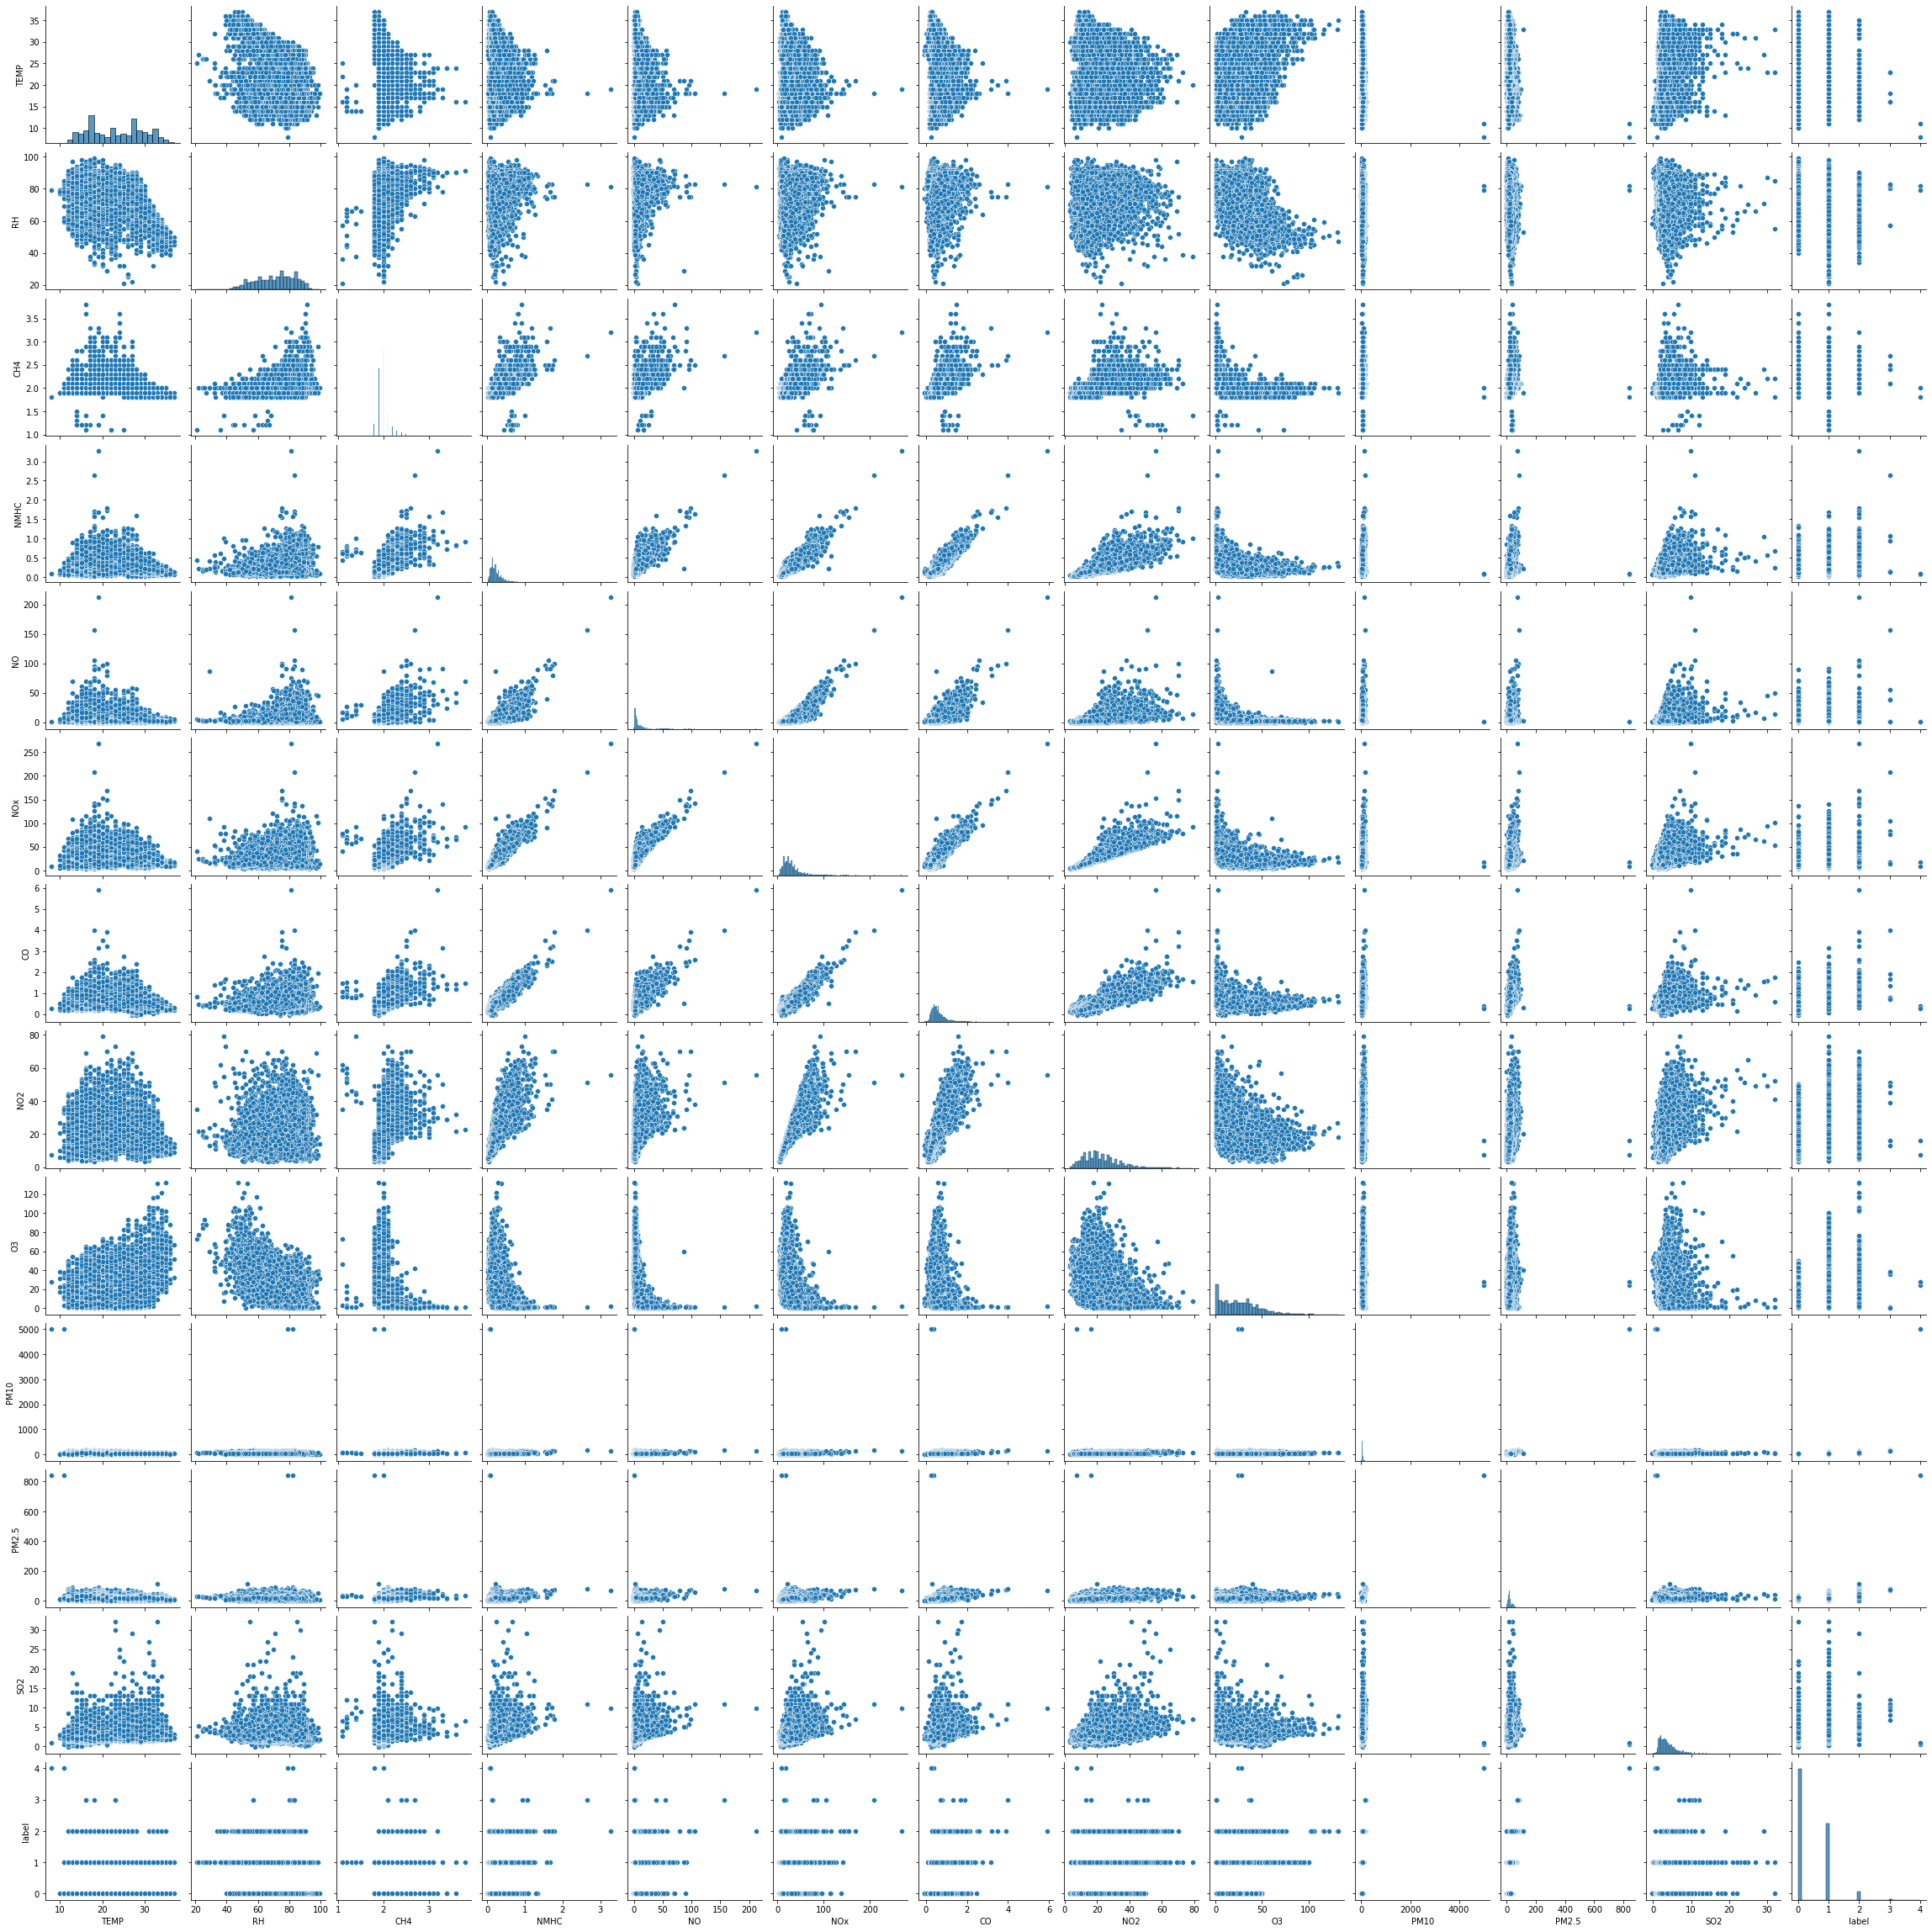

In [35]:
sns.pairplot(data)

In [36]:
data.head()

,TEMP,RH,CH4,NMHC,NO,NOx,CO,NO2,O3,PM10,PM2.5,SO2,label
0,16.0,57.0,2.1,0.14,1.2,17.0,0.79,16.0,37.0,177.0,78.0,12.0,3
1,16.0,57.0,2.1,0.15,1.3,17.0,0.80,16.0,36.0,178.0,77.0,11.0,3
2,16.0,57.0,2.1,0.13,1.0,14.0,0.71,13.0,38.0,163.0,72.0,8.0,3
3,15.0,58.0,2.0,0.12,0.8,12.0,0.66,11.0,39.0,147.0,65.0,6.5,2
4,15.0,58.0,2.0,0.11,0.6,11.0,0.53,10.0,38.0,131.0,56.0,5.5,2


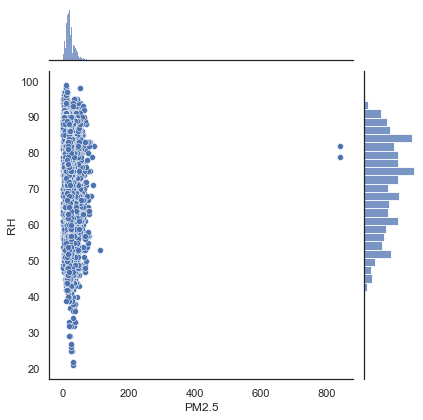

In [37]:
sns.set(style="white", color_codes=True)
sns.jointplot(x='PM2.5',y='RH',data=data) 

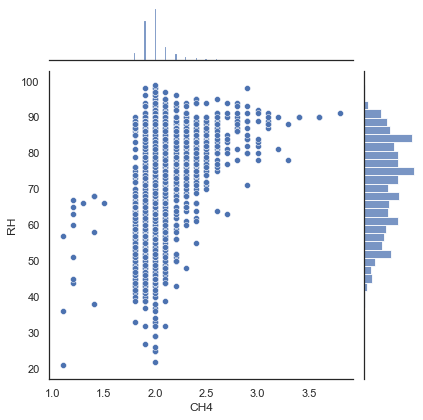

In [38]:
sns.set(style="white", color_codes=True)
sns.jointplot(x='CH4',y='RH',data=data)

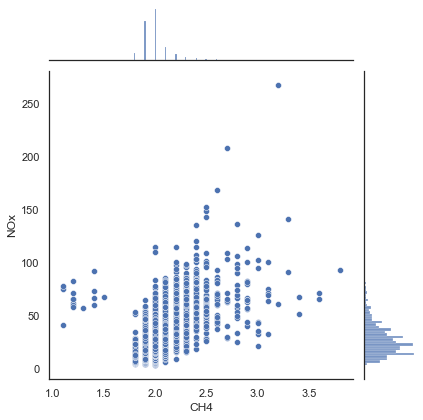

In [39]:
sns.set(style="white", color_codes=True)
sns.jointplot(x='CH4',y='NOx',data=data)

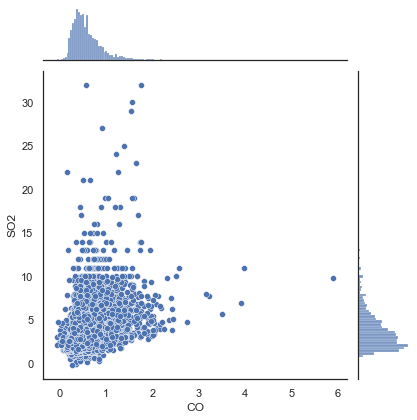

In [40]:
sns.set(style="white", color_codes=True)
sns.jointplot(x='CO',y='SO2',data=data)

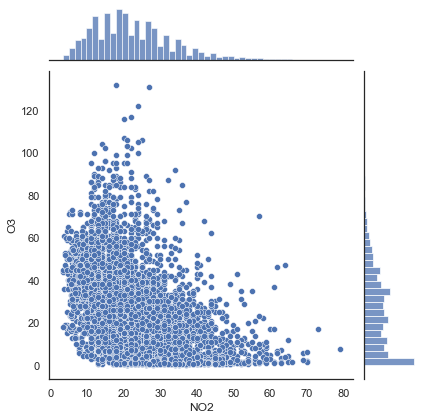

In [41]:
sns.set(style="white", color_codes=True)
sns.jointplot(x='NO2',y='O3',data=data)

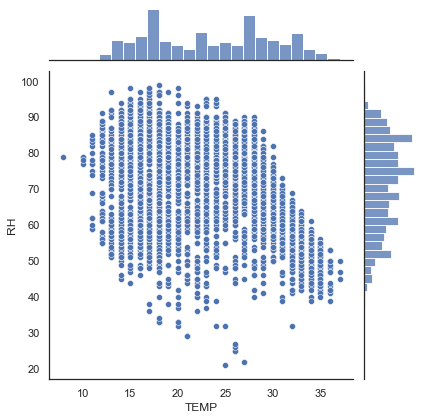

In [42]:
sns.set(style="white", color_codes=True)
sns.jointplot(x='TEMP',y='RH',data=data)

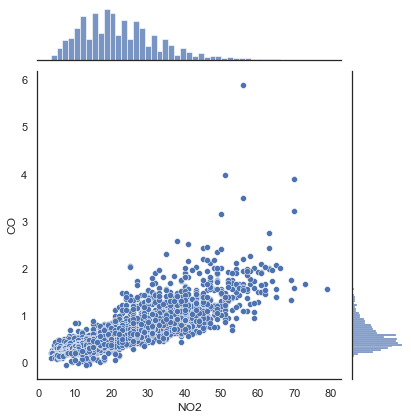

In [43]:
sns.set(style="white", color_codes=True)
sns.jointplot(x='NO2',y='CO',data=data)

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X = data.drop('label', axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


In [46]:
X_train.to_excel('X_train.xlsx')
X_test.to_excel('X_test.xlsx')
y_train.to_excel('y_train.xlsx')
y_test.to_excel('y_test.xlsx')

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rfc = RandomForestClassifier(n_estimators=600)

In [49]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [50]:
predictions = rfc.predict(X_test)

In [51]:
predictions

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 2, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 2, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 2, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 2, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,

In [52]:
from sklearn.metrics import classification_report,confusion_matrix

In [53]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       614
           1       1.00      1.00      1.00       346
           2       0.95      0.97      0.96        37
           3       1.00      0.33      0.50         3

    accuracy                           1.00      1000
   macro avg       0.99      0.83      0.86      1000
weighted avg       1.00      1.00      1.00      1000



In [54]:
print(confusion_matrix(y_test,predictions))

[[614   0   0   0]
 [  1 345   0   0]
 [  0   1  36   0]
 [  0   0   2   1]]


In [55]:
CO = X_test.CO
SO2 = X_test.SO2
NO2 = X_test.NO2
O3 = X_test.O3
PM10 = X_test.PM10

In [56]:
CO_mean = CO.mean()
SO2_mean = SO2.mean()
NO2_mean = NO2.mean()
O3_mean = O3.mean()
PM10_mean = PM10.mean()

In [57]:
def checkCo(q):
    v = ''
    if q > 0 and q <= 1:
        v = "Good"
    elif q > 1.1 and q <= 2.0:
        v = "Satisfactory"
    elif q > 2.1 and q <= 10:
        v = "Moderately Polluted"
    elif q > 10 and q <= 17:
        v = "Poor"
    elif q > 17 and q <= 34:
        v = "Very Poor"
    else:
        v = "Severe"
        
    print('CO-->  %2.3f    %s' %(q, v))
        

In [58]:
def checkSO2(q):
    v = ''
    if q > 0 and q <= 40:
        v = "Good"
    elif q > 41 and q <= 80:
        v = "Satisfactory"
    elif q > 81 and q <= 380:
        v = "Moderately Polluted"
    elif q > 381 and q <= 800:
        v = "Poor"
    elif q > 801 and q <= 1600:
        v = "Very Poor"
    else:
        v = "Severe"
        
    print('SO2-->  %2.3f    %s' %(q, v))

In [59]:
def checkNO2(q):
    v = ''
    if q > 0 and q <= 40:
        v = "Good"
    elif q > 41 and q <= 80:
        v = "Satisfactory"
    elif q > 81 and q <= 180:
        v = "Moderately Polluted"
    elif q > 181 and q <= 280:
        v = "Poor"
    elif q > 281 and q <= 400:
        v = "Very Poor"
    else:
        v = "Severe"
        
    print('NO2-->  %2.3f    %s' %(q, v))

In [60]:
def checkO3(q):
    v = ''
    if q > 0 and q <= 50:
        v = "Good"
    elif q > 51 and q <= 100:
        v = "Satisfactory"
    elif q > 101 and q <= 168:
        v = "Moderately Polluted"
    elif q > 169 and q <= 208:
        v = "Poor"
    elif q > 209 and q <= 748:
        v = "Very Poor"
    else:
        v = "Severe"
        
    print('O3-->  %2.3f    %s' %(q, v))

In [61]:
def checkPM(q):
    v = ''
    if q > 0 and q <= 50:
        v = "Good"
    elif q > 51 and q <= 100:
        v = "Satisfactory"
    elif q > 101 and q <= 250:
        v = "Moderately Polluted"
    elif q > 251 and q <= 350:
        v = "Poor"
    elif q > 351 and q <= 430:
        v = "Very Poor"
    else:
        v = "Severe"
    print('PM-->  %2.3f    %s' %(q, v))

In [62]:
l = [checkCo(CO_mean), checkSO2(SO2_mean), checkNO2(NO2_mean), checkO3(O3_mean), checkPM(PM10_mean)]
plt.show()

CO-->  0.613    Good
SO2-->  3.867    Good
NO2-->  22.718    Good
O3-->  25.848    Good
PM-->  47.326    Good


CO-->  0.613    Good
SO2-->  3.867    Good
NO2-->  22.718    Good
O3-->  25.848    Good
PM-->  47.326    Good


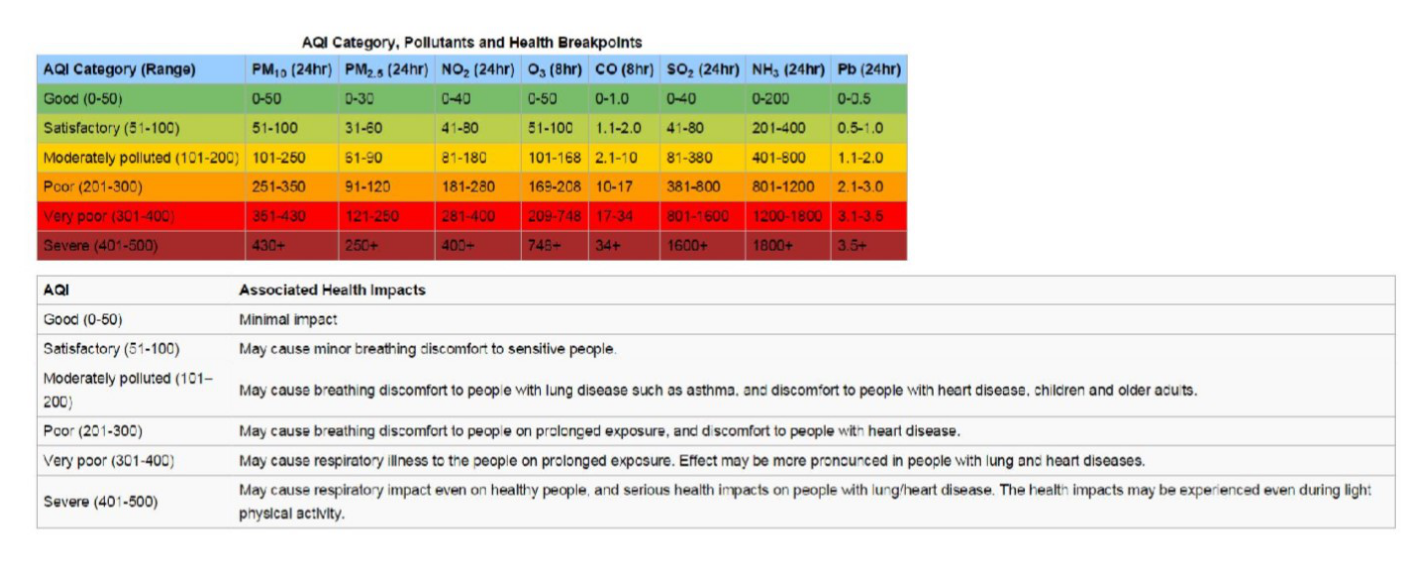

In [74]:
l = [checkCo(CO_mean), checkSO2(SO2_mean), checkNO2(NO2_mean), checkO3(O3_mean), checkPM(PM10_mean)]
plt.figure(figsize=(15,8), dpi=120)
image = plt.imread('health.jpg')
plt.axis('off')
plt.imshow(image)
plt.show()

In [67]:
x_test_dt = [[1,38,2.1,0.14,1.2,17,0.79,89,38,77,78,12]]

In [68]:
df = pd.DataFrame(x_test_dt)

In [69]:
pred = rfc.predict(df)

In [75]:
print (pred)

[1]
